In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

#my_data = 'C:\\Users\\Administrator\\Deep learning\\Final Project\\fer2013.csv'

In [2]:
#os.listdir(my_data)

In [4]:
filname = 'fer2013.csv'
emotion_label = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'natural']
names=['emotion','pixels','usage']
df=pd.read_csv('fer2013.csv',
               names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [5]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [6]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [7]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [9]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization


In [10]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model


model=my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
path_model='model_filter.h5'
model=my_model()
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[early_stop]
            )

Epoch 1/20
505/505 [==============================] - 5079s 10s/step - loss: 1.7008 - accuracy: 0.3366 - val_loss: 1.6370 - val_accuracy: 0.3722
Epoch 2/20
505/505 [==============================] - 5016s 10s/step - loss: 1.3758 - accuracy: 0.4758 - val_loss: 1.4089 - val_accuracy: 0.4639
Epoch 3/20
505/505 [==============================] - 5047s 10s/step - loss: 1.1847 - accuracy: 0.5544 - val_loss: 1.2424 - val_accuracy: 0.5130
Epoch 4/20
505/505 [==============================] - 5039s 10s/step - loss: 1.0528 - accuracy: 0.6025 - val_loss: 1.1783 - val_accuracy: 0.5612
Epoch 5/20
505/505 [==============================] - 5032s 10s/step - loss: 0.9224 - accuracy: 0.6608 - val_loss: 1.1456 - val_accuracy: 0.5642
Epoch 6/20
505/505 [==============================] - 5582s 11s/step - loss: 0.7759 - accuracy: 0.7178 - val_loss: 1.1936 - val_accuracy: 0.5598
Epoch 7/20
449/505 [=========================>....] - ETA: 10:55 - loss: 0.6003 - accuracy: 0.7849

In [55]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'netural')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [56]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'netural']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [217]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

(3589, 7)

C:\Users\abcdu\anaconda3\envs\base2\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


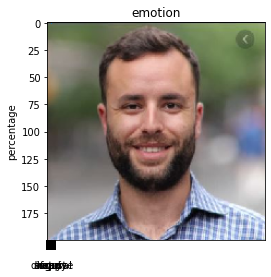

Expression Prediction: happy


In [218]:
from skimage import io
img = image.load_img('C:\\Users\\abcdu\\DeepLearning\\files\\emotion\\Happy\\12.jpg', 
                     grayscale=True, target_size=(48, 48))
show_img=image.load_img('C:\\Users\\abcdu\\DeepLearning\\files\\emotion\\Happy\\12.jpg', 
                        grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

C:\Users\abcdu\anaconda3\envs\base2\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


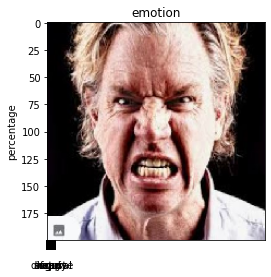

Expression Prediction: angry


In [231]:
from skimage import io
img = image.load_img('C:\\Users\\abcdu\\DeepLearning\\files\\emotion\\Angry\\12.jpg', 
                     grayscale=True, target_size=(48, 48))
show_img=image.load_img('C:\\Users\\abcdu\\DeepLearning\\files\\emotion\\Angry\\12.jpg', 
                        grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

C:\Users\abcdu\anaconda3\envs\base2\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


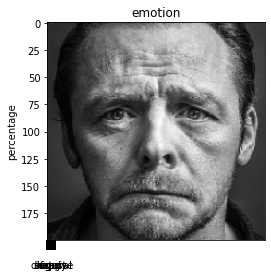

Expression Prediction: sad


In [235]:
from skimage import io
img = image.load_img('C:\\Users\\abcdu\\DeepLearning\\files\\emotion\\Sad\\3-1.jpg', 
                     grayscale=True, target_size=(48, 48))
show_img=image.load_img('C:\\Users\\abcdu\\DeepLearning\\files\\emotion\\Sad\\3-1.jpg', 
                        grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

In [236]:
df = pd.read_csv('Songs.csv')
Song_df = df.dropna(axis=0)
Song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 707
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Song Name     708 non-null    object
 1   Singer        708 non-null    object
 2   Youtube link  708 non-null    object
 3   Description   708 non-null    object
 4   Category      708 non-null    object
dtypes: object(5)
memory usage: 33.2+ KB


In [237]:
if (ind==0 or ind==1):
    Angsong=Song_df['Category']=='Angry'
    emo_song=Song_df[Angsong]
    endnum=309
elif (ind==4 or ind==2):
    Sadsong=Song_df['Category']=='Sad'
    emo_song=Song_df[Sadsong]
    endnum=181
else:
    Hapsong=Song_df['Category']=='Happy'
    emo_song=Song_df[Hapsong]
    endnum=219

In [239]:
import random

list=[]
rnum=random.randint(0,endnum)

for i in range(5):
    while rnum in list:
        rnum=random.randint(0,endnum)
    list.append(rnum)
    
list.sort()

for j in list:
    print(emo_song.iloc[j])
    print('\n')

Song Name                                      The Quiet Morning 
Singer                                            David Fesliyan 
Youtube link            https://www.youtube.com/embed/12SImwAMEUk
Description     The Quiet Morning is all about that morning ho...
Category                                                      Sad
Name: 501, dtype: object


Song Name                                     Beginnings 
Singer                                    David Fesliyan 
Youtube link    https://www.youtube.com/embed/HGPlHKRwsmU
Description           Sad, Epic, Motivating And Inspiring
Category                                              Sad
Name: 544, dtype: object


Song Name                                      Panic Man 
Singer                                    David Fesliyan 
Youtube link    https://www.youtube.com/embed/-sSVQrnvyIk
Description                            Scary Horror, Dark
Category                                              Sad
Name: 590, dtype: object


Song Name